In [1]:
import numpy as np
import pandas as pd
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras import optimizers
from keras import losses 
from keras import metrics
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import pickle as pkl
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/home/pratik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pratik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pratik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pratik/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
np.random.seed(7)

In [3]:
data = pd.read_csv('PhisingWebsite_datset.csv')

In [4]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
data.ndim

2

In [6]:
data.shape

(11055, 31)

In [7]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [8]:
data.groupby('Result').describe()

having_IP_Address                                               \
                   count      mean       std  min  25%  50%  75%  max   
Result                                                                  
-1                4898.0  0.213557  0.977030 -1.0 -1.0  1.0  1.0  1.0   
 1                6157.0  0.393536  0.919384 -1.0 -1.0  1.0  1.0  1.0   

       URL_Length            ... Links_pointing_to_page       \
            count      mean  ...                    75%  max   
Result                       ...                               
-1         4898.0 -0.682523  ...                    1.0  1.0   
 1         6157.0 -0.593958  ...                    1.0  1.0   

       Statistical_report                                               
                    count      mean       std  min  25%  50%  75%  max  
Result                                                                  
-1                 4898.0  0.657411  0.753609 -1.0  1.0  1.0  1.0  1.0  
 1                 6157.0  0.769043  0.639249 -1.0  1.0  1.0  1.0  1.0  

[2 rows x 240 columns]

In [9]:
data.Result.replace([-1 , 1 ], [0 , 1],inplace =True)

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
pd.isnull(data).sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [12]:
pd.isna(data).sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

# Wrapper features selection

In [13]:
def select_best_feature(data, k_features = 14, forward=False):
    features = data.drop('Result',axis =1)
    targets = data['Result']
    
    backwardModel=sfs(RandomForestRegressor(),k_features,forward,verbose=2,cv=5,n_jobs=-1,scoring='r2')
    backwardModel.fit(np.array(features),targets)
    
    print('Selected features index are : ',backwardModel.k_feature_idx_)
    
    selected_cols = data.columns[list(backwardModel.k_feature_idx_)]
    print(selected_cols)
    data_new = pd.concat([features[selected_cols.values], targets], axis=1, join='inner')
    return data_new

In [14]:
def prepare_data(data, flag=False):
    y = data['Result']
    if flag:
        data = select_best_feature(data)
    x = data.drop('Result',axis =1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)
    return x_train, x_test, y_train, y_test

In [15]:
cm_plot_labels = ['No-Phishing', 'Phishing']

In [16]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix'):
    
    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [17]:
#if flag == False : 
x_train, x_test, y_train, y_test = prepare_data(data=data,flag=False)

In [18]:
# if flag == True : Feature Selection
#x_train, x_test, y_train, y_test = prepare_data(data=data,flag=True)

In [19]:
#print the shape of the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7738, 30) (7738,) (3317, 30) (3317,)


# Artificial neural network

In [20]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [21]:
type(y_train)

pandas.core.frame.DataFrame

In [22]:
type(y_test)

pandas.core.frame.DataFrame

In [23]:
x_train.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
10168,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,...,1,-1,1,1,-1,0,-1,1,1,1
10167,-1,-1,1,1,1,-1,1,-1,-1,-1,...,1,-1,-1,1,1,1,-1,1,-1,1
2115,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,1,-1,-1,1,0,1
1699,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,0,-1,-1,0,1
1379,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,-1,1,0,1


In [24]:
y_train.head()

,Result
10168,0
10167,0
2115,0
1699,0
1379,1


In [27]:
train_data = pd.concat([x_train, y_train], axis=1, join='inner')
test_data = pd.concat([x_test, y_test], axis=1, join='inner')

In [28]:
train_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
10168,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,...,-1,1,1,-1,0,-1,1,1,1,0
10167,-1,-1,1,1,1,-1,1,-1,-1,-1,...,-1,-1,1,1,1,-1,1,-1,1,0
2115,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,-1,1,-1,-1,1,0,1,0
1699,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,1,0,-1,-1,0,1,0
1379,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,-1,1,0,1,1


In [29]:
test_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
10582,-1,-1,1,1,1,-1,-1,0,-1,1,...,1,1,1,1,0,-1,1,1,1,0
7533,-1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,-1,1,1,-1,1,-1,1,0
10806,-1,1,1,1,1,-1,1,-1,1,1,...,1,1,1,1,0,1,-1,1,1,0
2992,1,-1,1,1,1,-1,0,1,-1,-1,...,-1,-1,-1,-1,1,1,-1,1,-1,1
8940,1,-1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,-1,-1,0,1,1


In [30]:
train_data.to_csv('train.csv',index_label='Index')
test_data.to_csv('test.csv',index_label='Index')

In [31]:
#print the shape of the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7738, 30) (7738, 1) (3317, 30) (3317, 1)


In [32]:
x_train.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
10168,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,...,1,-1,1,1,-1,0,-1,1,1,1
10167,-1,-1,1,1,1,-1,1,-1,-1,-1,...,1,-1,-1,1,1,1,-1,1,-1,1
2115,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,1,-1,-1,1,0,1
1699,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,0,-1,-1,0,1
1379,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,-1,1,0,1


In [33]:
train_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.00000,7738.000000,7738.000000,7738.000000,7738.000000,...,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000
mean,0.312225,-0.631688,0.740501,0.701215,0.744637,-0.73404,0.062807,0.241794,-0.331610,0.631429,...,0.616697,0.816490,0.064099,0.383820,0.284053,-0.477643,0.720858,0.345309,0.722409,0.551564
std,0.950069,0.767229,0.672098,0.712996,0.667513,0.67915,0.819300,0.914646,0.943477,0.775484,...,0.787252,0.577397,0.998008,0.923468,0.827164,0.878611,0.693127,0.570633,0.691511,0.497366
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.00000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.00000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
test_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,...,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000
mean,0.317456,-0.636720,0.734700,0.699126,0.734097,-0.737112,0.066626,0.272234,-0.348809,0.621948,...,0.605668,0.817908,0.054567,0.361471,0.294845,-0.497739,0.723244,0.340971,0.712994,0.569491
std,0.948416,0.763548,0.678494,0.715107,0.679147,0.675873,0.813464,0.905214,0.937335,0.783177,...,0.795838,0.575436,0.998661,0.932524,0.829137,0.867458,0.690697,0.568409,0.701276,0.495222
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
x_train.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [36]:
y_train.dtypes

Result    int64
dtype: object

In [37]:
y_train.head(10)

,Result
10168,0
10167,0
2115,0
1699,0
1379,1
9755,1
2404,1
1395,1
7410,0
618,0


In [38]:
y_test.head(10)

,Result
10582,0
7533,0
10806,0
2992,1
8940,1
9054,1
304,1
9644,0
5034,0
1470,0


In [39]:
test_data.groupby('Result').describe()

having_IP_Address                                               \
                   count      mean       std  min  25%  50%  75%  max   
Result                                                                  
0                 1428.0  0.198880  0.980367 -1.0 -1.0  1.0  1.0  1.0   
1                 1889.0  0.407094  0.913628 -1.0 -1.0  1.0  1.0  1.0   

       URL_Length            ... Links_pointing_to_page       \
            count      mean  ...                    75%  max   
Result                       ...                               
0          1428.0 -0.674370  ...                    1.0  1.0   
1          1889.0 -0.608258  ...                    1.0  1.0   

       Statistical_report                                              
                    count     mean       std  min  25%  50%  75%  max  
Result                                                                 
0                  1428.0  0.64986  0.760320 -1.0  1.0  1.0  1.0  1.0  
1                  1889.0  0.76072  0.649252 -1.0  1.0  1.0  1.0  1.0  

[2 rows x 240 columns]

In [40]:
input_dim = x_train.shape[1]
print(input_dim)

30


In [41]:

model =Sequential()

In [42]:
model.add(Dense(32, input_dim =input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile(
    optimizer=keras.optimizers.Adam(lr =0.001),
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [44]:
model.fit(
    x_train,
    y_train,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose = 2
)


Train on 7738 samples, validate on 3317 samples
Epoch 1/30
 - 1s - loss: 0.4695 - accuracy: 0.7701 - val_loss: 0.2315 - val_accuracy: 0.9150
Epoch 2/30
 - 1s - loss: 0.2513 - accuracy: 0.9050 - val_loss: 0.1913 - val_accuracy: 0.9240
Epoch 3/30
 - 1s - loss: 0.2228 - accuracy: 0.9128 - val_loss: 0.1765 - val_accuracy: 0.9267
Epoch 4/30
 - 1s - loss: 0.1959 - accuracy: 0.9275 - val_loss: 0.1672 - val_accuracy: 0.9310
Epoch 5/30
 - 1s - loss: 0.1815 - accuracy: 0.9345 - val_loss: 0.1605 - val_accuracy: 0.9328
Epoch 6/30
 - 1s - loss: 0.1667 - accuracy: 0.9387 - val_loss: 0.1533 - val_accuracy: 0.9367
Epoch 7/30
 - 1s - loss: 0.1588 - accuracy: 0.9395 - val_loss: 0.1486 - val_accuracy: 0.9373
Epoch 8/30
 - 1s - loss: 0.1518 - accuracy: 0.9435 - val_loss: 0.1458 - val_accuracy: 0.9382
Epoch 9/30
 - 1s - loss: 0.1418 - accuracy: 0.9429 - val_loss: 0.1445 - val_accuracy: 0.9400
Epoch 10/30
 - 1s - loss: 0.1383 - accuracy: 0.9465 - val_loss: 0.1433 - val_accuracy: 0.9397
Epoch 11/30
 - 1s - 

In [45]:
predictions = model.predict(x_test)

In [46]:
for predict in predictions:
    print(predict)

[8.940697e-08]
[3.221631e-05]
[0.00152192]
[0.9999924]
[0.999997]
[0.99967104]
[0.9150242]
[0.00092468]
[0.10704872]
[0.6271965]
[0.9999995]
[1.]
[0.99986315]
[1.]
[0.9981195]
[0.]
[0.99999446]
[0.09891343]
[0.12915292]
[0.]
[0.]
[0.79786783]
[0.]
[1.]
[0.9999995]
[0.]
[0.99996006]
[0.9999952]
[1.]
[0.19902882]
[1.4901161e-07]
[1.4901161e-07]
[0.71719384]
[0.99677473]
[0.9999997]
[0.99996895]
[1.]
[0.18588737]
[0.9999831]
[0.589803]
[0.8875617]
[0.9999786]
[0.00393638]
[1.]
[1.]
[0.9999814]
[0.99999833]
[0.9974961]
[1.]
[0.99998236]
[1.]
[1.]
[0.997988]
[0.9980649]
[1.]
[3.8564205e-05]
[1.]
[0.]
[1.1920929e-07]
[0.00356603]
[0.9999928]
[0.99999607]
[0.]
[0.00677499]
[0.99998]
[0.]
[1.]
[0.0728744]
[0.9906715]
[0.9999928]
[0.9999594]
[0.]
[1.]
[0.0125106]
[0.]
[0.99999964]
[0.73629624]
[0.]
[0.]
[1.]
[1.]
[0.98735416]
[0.00451803]
[1.1622906e-06]
[1.]
[1.]
[0.]
[0.9832063]
[0.00709286]
[0.9999836]
[0.9999999]
[0.8026092]
[1.]
[0.]
[0.98721254]
[1.]
[0.]
[1.5228987e-05]
[0.]
[0.]
[0.5109

[1.]
[0.]
[1.]
[0.7672582]
[1.]
[1.]
[0.9999999]
[0.19814828]
[0.9620296]
[1.4901161e-07]
[0.71218]
[0.]
[0.]
[0.]
[0.99999857]
[0.47336867]
[0.09693572]
[2.026558e-06]
[0.9999999]
[0.9701657]
[0.98961055]
[0.19819853]
[0.]
[0.9451231]
[0.]
[0.9927014]
[0.10901853]
[0.99937785]
[0.00010499]
[1.]
[0.]
[1.]
[0.99896216]
[0.99863136]
[0.]
[0.93700904]
[0.9999108]
[1.]
[1.]
[0.]
[0.99769473]
[0.7673992]
[0.]
[0.]
[0.]
[0.00303119]
[0.2710075]
[0.9998568]
[0.9999999]
[0.]
[0.]
[0.9999999]
[0.9999928]
[0.]
[0.9567101]
[1.]
[0.]
[0.08773655]
[2.682209e-07]
[0.]
[0.9704155]
[0.8742193]
[7.6293945e-06]
[0.99995047]
[0.99994135]
[0.9999992]
[0.9997021]
[0.99999976]
[1.]
[0.]
[0.]
[0.03982386]
[0.6769722]
[0.00406778]
[0.89573836]
[0.]
[0.]
[0.99970376]
[0.69594544]
[0.14674044]
[1.]
[0.3743854]
[1.]
[2.3543835e-06]
[1.]
[0.99781823]
[0.9998486]
[0.]
[3.2007694e-05]
[1.]
[0.9975816]
[0.]
[0.9982284]
[0.]
[0.49923018]
[0.99992824]
[0.99997795]
[0.]
[0.]
[0.9999996]
[0.00177503]
[0.]
[0.83664596]
[

In [47]:
rounded_predictions = model.predict_classes(x_test)

In [48]:
# model performance
accuracy = model.evaluate(x= x_test, y= y_test, batch_size=32)
print("Accuracy percentage is : ",100.0 * accuracy[1])

3317/3317 [==============================] - 0s 27us/step
Accuracy percentage is :  95.99035382270813


In [49]:
for i in range(10):
    print(rounded_predictions[i])

[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]


In [50]:
y_test.head(10)

,Result
10582,0
7533,0
10806,0
2992,1
8940,1
9054,1
304,1
9644,0
5034,0
1470,0


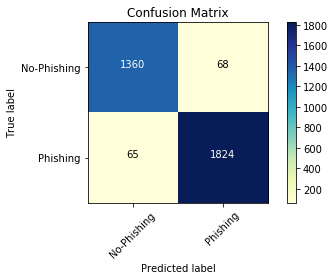

In [51]:
cm = confusion_matrix(y_pred=rounded_predictions, y_true=y_test)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [52]:
print(classification_report(y_true=y_test,y_pred=rounded_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1428
           1       0.96      0.97      0.96      1889

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [53]:
nn_acc = accuracy_score(y_true=y_test, y_pred= rounded_predictions)
print("Overall accuracy of ANN model using test-set is : %f" %(nn_acc*100))

Overall accuracy of ANN model using test-set is : 95.990353
